# Use of tanh funtion as the activation function for hidden layer

In [222]:

import math
import numpy as np
import matplotlib.pyplot as plt

In [223]:
 # Initialize the Parameters   
def initialize_parameters(n_x,n_h,n_y):
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros(shape=(n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros(shape=(n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
        
    return parameters    

In [224]:
#Activation Funtion
def sigmoid(Z):             # Use of sigmoid function
    A=1/(1+np.exp(-Z))
    return A

def tanh(Z):               # Use of tanh function
    A=np.tanh(Z)
    return A

In [225]:
#Calculation of Z = W*A_previouse + B
def linear_forward(A,W,b):
    Z=np.dot(W,A)+b
    linear_cache = (A,W,b)
    return Z,linear_cache

In [226]:
# Calculation the of the activation Funtion. 
#        A = Sigmoid(Z) **Need to Update**
def linear_activation_forward(A_prev, W, b, activation_type): 
    
    if activation_type == "Sigmoid":            #Use of activation funtion is Sigmoid funtion
        Z,linear_cache=linear_forward(A_prev,W,b)
        A=sigmoid(Z)
        
    elif activation_type == "tanh":            #Use of activation funtion is Sigmoid funtion
        Z,linear_cache=linear_forward(A_prev,W,b)
        A=tanh(Z)
    return A,Z,linear_cache  

In [227]:
# Compute Cost of the overall model.
#       Cost = Summation(Loss)/(Number of input data), where Loss= - Y*ln(Activation) - (1-Y)*ln(1 - Activation)
def compute_cost(AL,Y):
    data_length = Y.shape[1]
    cost =(-1/data_length) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    cost = np.squeeze(cost)
    assert(cost.shape == ())  
    return cost

In [228]:
# Linear_backward
def linear_backward(dZ, A):
    data_length = A.shape[1]
    dW = (1/data_length)*np.dot(dZ,A.T)
    db = (1/data_length)*np.sum(dZ, axis=1, keepdims=True)
    return dW,db

In [229]:
# Linear_activation_backward
def linear_activation_backward(A, cache, Layer):
    if Layer == "Output Layer":
        Y, AL = cache
        dZ2 = A - Y
        dW, db = linear_backward(dZ2, AL)
        return dZ2, dW, db
    elif Layer == "Hidden Layer":
        X, W2, dZ2 = cache
        dZ1 = np.dot(W2.T,dZ2)*(1 - pow(A,2))
        dW, db = linear_backward(dZ1, X)
        return dW, db

In [230]:
# Updates the parameters according to the obtained gradient values
def update_parameters(parameters, grads, learning_rate):
    
    Layers = len(parameters)//2           # number of layers in the neural network
    
    for l in range(Layers):                  # Update rule for each parameter. Use a for loop.
        parameters["W" + str(l+1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]    
    return parameters

In [231]:
# Main body of the Nueral Net Model which contains the procedural instructions to the execution of Nueral net model
def two_layer_network(X,Y,learningrate,n_x,n_h,n_y,num_iterations,print_cost):
    costs=[]
    
    #Initailise and fetch the weights through dictionary
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
    
        # Forward propagation
        A1,Z1,linear_cache1 = linear_activation_forward(X, W1, b1, "tanh")   #Calculation of activaion output of hidden layer
        A2,Z2,linear_cache2 = linear_activation_forward(A1, W2, b2, "Sigmoid")  #Calculation of activation output of output layer
    
        # Compute cost
        cost = compute_cost(A2, Y)
        costs.append(cost)       
    
        # Backward propagation
        cache = (Y, A1)
        dZ2 ,dW2, db2 = linear_activation_backward(A2, cache, "Output Layer")
        cache = (X, W2, dZ2)
        dW1, db1 = linear_activation_backward(A1, cache, "Hidden Layer")
        
    
        # Stores the gradient values in the dictionary grads
        grads = { "dW1" : dW1,
                  "db1" : db1,
                  "dW2" : dW2,
                  "db2" : db2}
        
        # Update the parameters
        parameters =  update_parameters(parameters, grads, learningrate)
    
        # Retrieve W1, b1, W2, b2 from the dictionary parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        #Vary the learning rate
        if(cost > 0.1):
            learningrate = learningrate
        elif(cost<0.1 and cost>0.01):
            learningrate = 0.5
        elif(cost<0.01):
            learningrate = 0.02
        
        # Print the cost every 100 training example
        if print_cost and i % 100000 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    
    #Plot the cost funtion curve
    plt.plot(costs)
    plt.ylabel("Cost")
    plt.xlabel("iterations")
    plt.show()
    return parameters

In [232]:
#Input data
X=(1/255)*np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,17,17,17,17,81,180,180,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,253,253,253,253,253,253,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,228,253,253,253,253,253,253,253,207,197,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213,253,253,253,253,253,253,253,253,253,253,223,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,231,253,253,253,108,40,40,115,244,253,253,134,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,114,114,114,37,0,0,0,205,253,253,253,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,253,253,253,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,253,253,253,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,253,253,253,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,253,253,253,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,99,96,0,0,45,224,253,253,195,10,0,0,0,0,0,0,0,0,0,0,0,11,25,105,83,189,189,228,253,251,189,189,218,253,253,210,27,0,0,0,0,0,0,0,0,0,0,42,116,173,253,253,253,253,253,253,253,253,253,253,253,253,253,221,116,7,0,0,0,0,0,0,0,0,0,118,253,253,253,253,245,212,222,253,253,253,253,253,253,253,253,253,253,160,15,0,0,0,0,0,0,0,0,254,253,253,253,189,99,0,32,202,253,253,253,240,122,122,190,253,253,253,174,0,0,0,0,0,0,0,0,255,253,253,253,238,222,222,222,241,253,253,230,70,0,0,17,175,229,253,253,0,0,0,0,0,0,0,0,158,253,253,253,253,253,253,253,253,205,106,65,0,0,0,0,0,62,244,157,0,0,0,0,0,0,0,0,6,26,179,179,179,179,179,30,15,10,0,0,0,0,0,0,0,0,14,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,85,85,85,85,85,85,85,85,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,128,168,250,250,250,252,250,250,250,250,231,127,63,0,0,0,0,0,0,0,0,0,0,0,0,85,168,237,252,250,250,250,250,252,250,250,250,250,252,250,209,56,0,0,0,0,0,0,0,0,0,0,0,127,250,250,252,250,250,250,250,252,250,250,250,250,252,250,250,83,0,0,0,0,0,0,0,0,0,8,113,252,252,252,247,210,210,210,210,177,0,0,0,0,43,252,252,83,0,0,0,0,0,0,0,0,0,43,250,250,250,250,210,0,0,0,0,0,0,0,0,0,28,194,250,138,14,0,0,0,0,0,0,0,0,43,250,250,250,250,210,0,0,0,0,0,0,0,0,0,0,85,250,250,41,0,0,0,0,0,0,0,0,43,250,250,137,83,70,0,0,0,0,0,0,0,0,0,0,28,167,250,41,0,0,0,0,0,0,0,0,219,250,144,14,0,0,0,0,0,0,0,0,0,0,0,0,0,127,250,217,0,0,0,0,0,0,0,0,254,238,105,0,0,0,0,0,0,0,0,0,0,0,0,0,15,148,252,252,0,0,0,0,0,0,0,0,252,166,0,0,0,0,0,0,0,0,0,0,0,0,0,85,140,250,250,179,0,0,0,0,0,0,0,0,252,208,63,0,0,0,0,0,0,0,0,0,0,85,127,252,250,250,250,41,0,0,0,0,0,0,0,0,252,250,209,56,0,0,0,0,0,141,170,168,168,223,250,252,250,250,137,14,0,0,0,0,0,0,0,0,252,250,250,223,210,212,210,210,210,244,252,250,250,250,250,252,250,144,14,0,0,0,0,0,0,0,0,0,43,252,252,252,252,254,252,252,252,252,255,252,252,252,217,177,0,0,0,0,0,0,0,0,0,0,0,0,28,166,208,250,250,252,250,250,250,250,238,166,166,166,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,125,125,146,250,250,165,125,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,83,83,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,100,213,254,245,255,149,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,181,233,102,40,29,102,166,187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,236,181,35,0,0,0,0,12,207,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,228,187,0,0,0,0,0,0,96,225,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,167,230,18,0,0,0,0,0,74,242,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,247,60,0,0,0,0,0,67,232,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,211,0,0,0,0,16,127,225,165,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,217,0,15,58,140,189,181,227,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,246,225,235,253,182,61,231,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,143,119,58,1,153,212,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,254,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,244,157,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,212,211,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,237,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,243,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,213,213,5,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,244,35,0,0,0,0,0,0,139,208,97,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,248,90,0,0,0,0,0,0,0,16,136,172,168,0,0,0,0,0,0,0,0,0,0,0,0,0,5,195,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,237,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,2,12,45,109,109,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,207,58,116,227,254,253,253,209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,228,254,185,174,91,92,111,217,254,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,141,24,9,0,0,0,0,43,253,253,0,0,0,0,0,0,0,0,33,0,0,0,0,0,0,0,23,139,104,0,0,0,0,0,0,50,253,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180,246,20,0,0,0,0,0,0,166,253,220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,147,72,0,0,0,0,0,0,40,243,253,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,248,52,0,0,0,0,0,47,215,254,216,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,217,215,0,0,0,0,0,40,209,253,245,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,243,67,0,0,0,19,146,243,254,225,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,243,131,0,12,154,226,253,246,151,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,217,248,181,228,253,253,214,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,254,254,255,254,172,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,89,108,109,24,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,80,175,242,205,93,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,171,254,253,253,253,254,214,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,253,249,134,134,212,254,253,182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,253,90,0,0,6,133,253,249,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,20,218,254,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,226,253,193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,12,0,0,0,0,0,5,208,253,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,30,0,0,0,0,20,253,235,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,133,157,122,230,254,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,253,253,253,254,187,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,204,253,253,254,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,104,247,254,250,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,255,254,218,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145,253,253,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,114,158,12,0,20,253,253,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,121,234,242,28,0,0,20,253,253,97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,194,254,248,49,0,17,68,206,254,231,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,194,253,253,235,196,195,244,253,254,247,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79,254,253,253,253,254,253,253,253,207,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,128,211,253,253,224,175,157,97,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,224,254,254,156,156,89,59,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,253,250,241,254,253,253,253,223,215,169,50,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,147,253,183,30,78,115,145,174,174,223,253,253,181,101,0,0,0,0,0,0,0,0,0,0,0,0,0,47,235,253,153,0,0,0,0,0,0,35,79,196,253,253,152,6,0,0,0,0,0,0,0,0,0,0,0,156,253,253,117,0,0,0,0,0,0,0,0,18,73,230,254,114,0,0,0,0,0,0,0,0,0,0,0,156,254,235,15,0,0,0,0,0,0,0,0,0,10,209,255,76,0,0,0,0,0,0,0,0,0,0,0,107,233,124,0,0,0,0,0,0,0,0,0,0,159,253,171,9,7,20,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,109,101,175,176,175,175,217,253,254,187,199,253,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,207,253,253,253,229,232,253,253,200,57,19,19,57,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,185,140,58,23,154,253,185,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,239,213,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,239,243,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,183,254,135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,253,222,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,253,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79,254,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,167,253,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,253,240,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,253,213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72,185,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,164,253,255,253,118,59,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,251,251,253,251,251,251,199,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,198,251,251,253,251,251,251,251,204,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,117,251,251,243,212,239,251,251,251,218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,251,251,251,120,0,175,251,251,251,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97,237,251,251,251,0,0,67,240,251,251,243,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,163,251,251,240,81,0,0,0,68,251,251,251,179,9,0,0,0,0,0,0,0,0,0,0,0,0,13,145,251,251,226,80,0,0,0,0,39,251,251,251,251,115,0,0,0,0,0,0,0,0,0,0,0,0,144,251,251,251,173,0,0,0,0,0,18,167,251,251,251,115,0,0,0,0,0,0,0,0,0,0,0,0,233,251,251,251,173,0,0,0,0,0,0,98,251,251,251,115,0,0,0,0,0,0,0,0,0,0,0,176,253,253,216,179,0,0,0,0,0,0,0,99,253,253,253,116,0,0,0,0,0,0,0,0,0,0,55,210,251,251,96,0,0,0,0,0,0,0,0,98,251,251,214,62,0,0,0,0,0,0,0,0,0,0,117,251,251,251,96,0,0,0,0,0,0,0,28,204,251,237,53,0,0,0,0,0,0,0,0,0,0,55,241,251,251,160,7,0,0,0,0,0,0,28,222,251,251,231,0,0,0,0,0,0,0,0,0,0,0,59,251,251,251,153,0,0,0,0,0,23,98,204,251,251,251,156,0,0,0,0,0,0,0,0,0,0,0,59,251,251,251,153,0,0,0,85,155,179,251,251,251,251,154,15,0,0,0,0,0,0,0,0,0,0,0,59,251,251,251,236,214,214,214,234,251,253,251,251,248,156,15,0,0,0,0,0,0,0,0,0,0,0,0,41,209,251,251,251,251,251,251,251,251,253,251,196,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,115,241,251,251,251,251,251,251,253,187,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,251,251,251,251,251,101,57,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,123,133,197,254,254,231,105,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,169,253,253,254,253,253,253,253,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,213,253,253,235,216,158,241,253,225,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,193,146,40,0,0,89,253,253,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,253,253,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,160,237,253,228,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,219,221,253,253,253,243,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,110,219,252,254,253,253,253,253,253,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,223,253,253,253,254,253,253,253,253,253,249,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,254,254,254,254,255,172,46,24,158,254,254,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,206,228,228,170,104,0,0,5,188,253,253,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,253,253,240,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72,253,253,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,189,253,253,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,85,230,253,253,197,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,37,85,151,253,253,253,232,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,218,218,218,234,218,233,253,254,253,253,211,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,157,253,253,253,253,253,253,253,254,253,167,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,213,253,253,253,253,200,132,127,11,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,96,84,48,96,96,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,190,228,253,244,221,251,251,230,170,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,189,251,251,253,251,251,251,251,253,251,188,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,244,251,235,188,253,251,251,235,188,213,251,251,244,83,0,0,0,0,0,0,0,0,0,0,0,0,100,253,251,172,70,0,253,251,172,70,0,36,114,251,251,94,0,0,0,0,0,0,0,0,0,0,48,134,253,255,241,79,0,0,0,0,0,0,0,0,0,128,253,95,0,0,0,0,0,0,0,0,0,4,142,251,251,241,93,0,0,0,0,0,0,0,0,0,0,127,251,212,0,0,0,0,0,0,0,0,0,32,251,251,251,79,0,0,0,0,0,0,0,0,0,0,0,127,251,172,0,0,0,0,0,0,0,0,24,186,251,251,113,0,0,0,0,0,0,0,0,0,0,0,0,127,251,94,0,0,0,0,0,0,0,0,96,251,251,211,35,0,0,0,0,0,0,0,0,0,0,0,20,205,251,94,0,0,0,0,0,0,0,0,96,253,253,31,0,0,0,0,0,0,0,0,0,0,0,36,214,253,253,95,0,0,0,0,0,0,0,0,214,251,156,8,0,0,0,0,0,0,0,0,0,0,0,115,251,251,204,23,0,0,0,0,0,0,0,0,173,251,126,0,0,0,0,0,0,0,0,0,0,0,0,253,251,251,109,0,0,0,0,0,0,0,0,0,96,251,236,67,0,0,0,0,0,0,0,0,0,56,221,253,251,140,4,0,0,0,0,0,0,0,0,0,96,251,251,228,59,0,0,0,0,0,0,20,158,181,251,253,251,126,0,0,0,0,0,0,0,0,0,0,60,170,253,253,253,195,24,48,134,253,255,253,253,253,253,219,138,0,0,0,0,0,0,0,0,0,0,0,0,28,236,251,251,253,205,221,251,251,253,251,251,251,231,138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,156,251,253,251,251,251,251,253,251,188,126,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,31,189,188,188,188,188,129,31,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,86,163,228,255,254,176,156,73,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,171,252,225,198,198,199,198,245,253,253,249,131,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,107,18,0,0,0,0,31,36,68,152,250,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,243,216,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,170,253,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,119,254,255,173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,107,225,253,214,83,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,159,241,245,171,120,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,123,199,241,253,169,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,137,253,253,253,253,254,186,135,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,181,181,181,181,182,223,254,254,221,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,63,147,237,249,152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,241,245,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,253,165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,170,253,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,106,255,238,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,93,185,253,254,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,37,102,186,230,248,253,227,133,16,0,0,0,0,0,0,0,0,0,0,0,0,0,3,25,109,135,199,226,253,253,254,253,250,189,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,253,253,195,247,240,233,188,163,111,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,56,139,221,255,223,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,182,209,209,209,228,253,253,253,253,250,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,253,253,253,253,253,253,253,210,139,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,241,253,242,233,233,192,133,50,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,253,228,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,253,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,232,253,97,0,0,0,69,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,253,253,99,134,216,239,251,245,111,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,253,253,253,253,253,253,253,253,253,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,176,253,253,253,235,184,104,166,246,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,148,116,49,31,0,0,0,132,240,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,201,244,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,253,173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,253,173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,254,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,170,179,81,0,0,0,0,43,229,236,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,167,253,253,114,0,0,0,23,173,253,228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,253,253,202,91,90,131,230,253,253,193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,249,253,253,253,253,253,253,253,196,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,187,253,253,253,253,253,125,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,114,192,255,253,156,122,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,21,57,252,252,253,189,210,252,252,116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,110,148,186,116,126,82,21,5,11,74,249,232,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,252,243,47,0,0,0,0,0,0,27,228,253,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,42,35,0,0,0,0,0,0,0,27,228,253,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,253,230,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,252,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,211,244,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,197,252,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,249,199,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,253,223,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,227,252,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,223,253,122,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,225,252,199,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,223,252,208,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,227,253,172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,253,252,157,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,249,253,201,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,252,199,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,208,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,248,255,170,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247,253,228,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,157,253,194,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,253,253,14,0,0,0,0,0,0,72,247,209,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79,244,253,38,0,0,0,0,0,0,169,253,253,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,193,253,215,38,0,0,0,0,39,215,253,253,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,193,253,253,214,0,0,0,0,122,253,253,253,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,222,251,245,185,138,46,185,245,253,253,208,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,239,253,253,253,253,253,253,253,253,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,144,253,253,253,215,197,253,253,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,76,76,76,39,70,253,253,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,253,253,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,224,253,253,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,243,253,246,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,253,253,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,234,253,202,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,226,253,253,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,241,253,253,223,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,231,253,253,151,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,226,253,253,145,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,191,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,255,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,255,255,255,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,255,255,255,255,255,255,255,255,255,255,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,191,128,255,255,255,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,255,255,64,0,0,128,255,0,128,255,255,255,64,0,0,0,0,0,0,0,0,0,0,0,64,255,255,255,255,0,0,0,0,0,0,0,0,64,255,255,255,64,0,0,0,0,0,0,0,0,0,0,128,255,255,191,0,0,0,0,0,0,0,0,0,0,191,255,255,255,64,0,0,0,0,0,0,0,0,0,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,191,255,255,128,0,0,0,0,0,0,0,0,0,255,255,255,64,0,0,0,0,0,0,0,0,0,0,0,128,255,255,191,0,0,0,0,0,0,0,0,0,255,255,191,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,255,0,0,0,0,0,0,0,0,64,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,191,255,255,191,0,0,0,0,0,0,0,0,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,128,0,0,0,0,0,0,0,0,128,255,255,128,0,0,0,0,0,0,0,0,0,0,128,255,255,255,191,0,0,0,0,0,0,0,0,0,128,255,255,255,0,0,0,0,0,0,0,0,0,191,255,255,255,191,0,0,0,0,0,0,0,0,0,0,0,255,255,255,128,0,0,0,0,0,0,64,191,255,255,255,191,0,0,0,0,0,0,0,0,0,0,0,0,191,255,255,255,128,128,128,128,128,128,255,255,255,255,191,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,255,255,255,255,255,255,255,255,255,191,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,255,255,255,255,255,255,255,128,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,191,255,255,255,191,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,0,0,0,0,0,0,0,0,0,0,64,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,0,0,0,191,255,128,0,0,0,0,0,0,0,0,0,0,0,0,191,255,128,0,0,0,0,0,0,0,0,0,191,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,0,0,64,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,64,255,191,0,0,0,0,0,0,0,0,191,255,255,255,64,0,0,0,0,0,0,0,0,0,0,0,0,191,255,128,0,0,0,0,0,0,0,191,255,255,255,191,0,0,0,0,0,0,0,0,0,0,0,0,64,255,255,0,0,0,0,0,0,0,128,255,255,255,255,64,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,0,0,0,0,0,0,191,255,128,128,255,64,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,0,0,64,191,255,255,191,64,0,128,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,128,0,0,0,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,255,255,255,128,64,0,0,0,0,128,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,255,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,130,254,218,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,197,252,253,252,135,57,85,15,85,137,163,128,116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119,252,252,253,252,251,246,252,237,252,252,252,252,250,58,0,0,0,0,0,0,0,0,0,0,0,0,0,127,252,252,253,252,252,252,252,253,252,252,252,252,253,63,0,0,0,0,0,0,0,0,0,0,0,0,0,127,252,252,253,252,252,252,208,253,252,252,252,252,253,63,0,0,0,0,0,0,0,0,0,0,0,0,0,62,211,211,107,106,106,35,36,254,253,253,253,253,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,85,155,242,253,252,252,252,217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,75,127,171,233,247,252,252,252,253,252,252,252,155,66,6,0,0,0,0,0,0,0,0,0,0,0,0,155,252,252,252,253,252,252,252,252,253,252,252,252,252,253,189,41,0,0,0,0,0,0,0,0,0,0,0,190,252,252,252,253,252,252,252,252,253,252,252,252,252,253,252,214,0,0,0,0,0,0,0,0,0,0,0,191,253,253,253,212,211,158,106,106,0,80,18,106,106,255,253,253,102,0,0,0,0,0,0,0,0,0,0,48,159,141,63,0,0,0,0,0,0,0,0,0,0,63,205,252,189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,251,221,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,237,183,14,0,0,0,0,0,0,0,0,0,80,62,80,0,0,0,0,0,0,0,0,0,0,0,36,242,252,128,0,0,0,0,0,0,0,0,0,105,253,253,253,253,254,174,148,78,25,0,0,0,29,130,255,253,253,172,0,0,0,0,0,0,0,0,0,148,252,252,252,252,253,252,252,252,182,146,111,182,232,252,253,252,157,21,0,0,0,0,0,0,0,0,0,139,252,252,252,252,253,252,252,252,252,253,252,252,252,252,253,236,72,0,0,0,0,0,0,0,0,0,0,14,163,247,252,252,253,252,252,252,252,253,252,252,252,226,172,21,0,0,0,0,0,0,0,0,0,0,0,0,0,38,113,191,253,252,252,226,147,147,147,94,42,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,60,136,250,255,254,171,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,152,253,253,253,253,253,253,223,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,227,253,253,206,142,82,82,177,253,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,228,253,200,86,8,0,0,0,60,253,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,253,114,12,0,0,0,0,0,101,253,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,238,48,0,0,0,0,0,18,209,253,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,0,0,0,3,123,243,244,253,253,145,72,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,253,253,253,253,253,253,253,253,174,24,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,231,201,94,94,94,94,201,253,253,253,101,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,0,0,0,135,201,253,253,135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,150,253,234,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,194,253,117,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,253,253,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,202,253,17,0,0,0,0,0,0,0,0,0,0,0,9,30,18,0,0,0,0,0,0,0,0,0,0,0,201,253,17,0,0,0,0,0,0,0,0,0,0,0,72,253,216,166,154,40,0,0,0,0,0,0,0,65,235,187,6,0,0,0,0,0,0,0,0,0,0,0,72,253,253,253,253,242,183,147,66,66,2,8,66,201,253,152,0,0,0,0,0,0,0,0,0,0,0,0,15,53,157,172,253,253,253,253,253,253,202,207,253,253,226,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,35,35,118,183,253,253,253,253,253,227,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,17,125,140,253,176,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,159,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,253,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,253,116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,248,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,221,246,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,173,240,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,197,255,139,86,85,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,253,251,253,251,253,251,225,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,141,253,254,253,254,253,254,253,254,139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,253,251,253,251,196,83,253,251,253,251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,253,255,253,169,56,0,169,254,253,254,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,197,251,253,251,0,0,0,168,253,251,253,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,198,253,255,253,85,85,141,253,254,253,254,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,251,253,251,253,251,253,251,253,251,196,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,254,253,254,253,254,253,254,253,169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,196,253,251,253,251,253,251,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,253,169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,253,251,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,253,169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,253,251,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,253,198,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,253,251,253,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,253,254,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,251,253,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,253,254,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,251,253,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,193,193,152,193,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,213,252,253,252,253,232,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,173,254,253,254,233,234,253,234,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,252,233,70,151,50,51,232,253,232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,254,253,142,0,0,0,0,41,234,253,193,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,253,252,20,0,0,0,0,0,71,252,253,232,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,203,254,192,0,0,0,0,0,0,0,123,254,253,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,203,253,151,0,0,0,0,0,0,0,0,253,252,243,81,0,0,0,0,0,0,0,0,0,0,0,0,31,233,254,151,0,0,0,0,0,0,0,0,82,243,254,151,0,0,0,0,0,0,0,0,0,0,0,0,51,252,253,111,0,0,0,0,0,0,0,0,0,203,253,151,0,0,0,0,0,0,0,0,0,0,0,0,52,253,244,40,0,0,0,0,0,0,0,0,0,203,254,151,0,0,0,0,0,0,0,0,0,0,0,0,92,252,203,0,0,0,0,0,0,0,0,0,0,203,253,151,0,0,0,0,0,0,0,0,0,0,0,0,152,253,254,50,0,0,0,0,0,0,0,0,51,233,254,151,0,0,0,0,0,0,0,0,0,0,0,0,152,252,253,91,0,0,0,0,0,0,0,0,233,252,233,50,0,0,0,0,0,0,0,0,0,0,0,0,92,253,254,151,0,0,0,0,0,0,11,173,254,253,123,0,0,0,0,0,0,0,0,0,0,0,0,0,31,232,253,151,0,0,0,0,0,41,173,252,253,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,203,255,213,41,0,0,0,92,233,254,253,183,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162,253,252,243,162,123,203,233,252,253,171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,193,253,254,253,254,253,244,203,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,131,213,252,253,252,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,188,254,255,209,29,63,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,161,246,254,254,254,254,254,247,252,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,189,250,254,232,165,135,186,226,254,254,254,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,232,254,226,111,17,0,0,0,62,242,254,212,7,0,0,0,0,0,0,0,0,0,0,0,0,0,43,225,254,170,21,0,0,0,0,48,229,254,254,64,0,0,0,0,0,0,0,0,0,0,0,0,0,9,156,254,212,9,0,0,0,0,59,230,254,254,224,9,0,0,0,0,0,0,0,0,0,0,0,0,0,62,254,238,47,0,0,0,19,142,252,208,233,254,179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62,254,223,28,18,85,138,235,249,128,4,207,254,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62,254,254,254,254,254,253,214,49,0,0,228,254,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,175,254,254,254,248,130,0,0,0,22,237,238,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,88,18,0,0,0,0,0,62,255,210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,146,254,210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,241,254,220,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,254,254,254,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,251,254,216,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,237,254,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,237,254,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,237,254,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,237,254,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,237,235,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,192,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,204,254,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,254,254,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,254,254,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,254,254,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,165,254,214,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,180,254,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,254,254,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,254,254,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160,255,236,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,189,254,177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,254,255,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,254,254,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,254,196,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142,254,195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,195,254,195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,224,254,195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,254,254,195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,254,254,148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,202,254,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,255,134,73,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,70,170,253,106,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,244,253,253,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162,253,253,253,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,241,253,253,220,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,76,245,253,253,218,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,159,253,253,253,237,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79,241,253,253,220,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,246,253,253,217,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,92,246,253,253,170,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,134,253,253,253,220,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,248,253,253,147,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,197,253,253,243,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,253,253,253,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,251,253,253,158,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,221,253,253,220,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,253,253,244,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,253,253,229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145,253,196,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,216,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,56,80,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,40,88,201,254,254,169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103,137,137,137,209,216,245,254,254,255,254,186,165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,252,254,254,254,254,254,254,187,151,44,19,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,16,97,157,121,103,79,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,240,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,254,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,249,236,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,254,135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,242,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,254,161,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,122,254,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,59,254,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,217,78,0,0,0,0,108,205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,201,242,33,0,0,34,243,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,254,222,124,119,205,245,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,186,254,254,254,254,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,74,98,98,86,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,128,128,128,128,128,128,128,255,255,255,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,255,255,255,255,255,255,255,255,255,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,255,255,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,255,255,255,255,255,255,255,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,191,128,128,128,128,0,0,0,128,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,255,255,255,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,255,255,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,221,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,113,0,0,0,0,145,245,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,167,0,0,0,0,169,189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,231,113,0,0,0,31,245,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,254,91,0,0,0,82,254,142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,160,254,43,0,0,1,191,254,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,254,199,4,0,0,16,254,204,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103,254,100,0,0,0,16,254,186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,238,243,28,11,69,130,238,254,182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69,254,246,190,251,254,254,254,254,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,254,254,213,155,114,249,254,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,110,54,11,4,0,0,244,227,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,249,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,254,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,215,249,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,217,239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,239,239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,254,210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,255,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,190,254,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,146,250,255,254,254,254,116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,177,230,253,253,253,253,253,253,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,114,211,253,252,160,139,139,186,253,253,202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,253,253,253,175,0,0,0,104,253,253,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,233,253,253,122,22,0,0,0,104,253,253,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,243,118,2,0,0,0,3,202,253,253,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,253,253,210,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,235,253,242,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,166,253,253,247,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,184,253,253,240,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,253,253,244,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,130,130,130,130,130,193,253,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,95,245,253,253,253,253,253,253,253,253,159,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,125,253,253,253,253,253,253,253,253,253,253,253,221,35,0,0,0,0,0,0,0,0,0,0,0,0,0,167,253,253,252,110,157,253,253,253,253,253,253,253,253,43,0,0,0,0,0,0,0,0,0,0,0,0,48,230,253,253,129,223,253,253,253,202,87,81,193,253,253,43,0,0,0,0,0,0,0,0,0,0,0,0,184,253,253,253,235,253,253,247,128,9,0,0,98,253,253,132,0,0,0,0,0,0,0,0,0,0,0,98,252,253,253,253,253,253,205,60,0,0,0,0,2,230,253,252,171,0,0,0,0,0,0,0,0,0,0,223,253,253,253,253,253,210,75,0,0,0,0,0,0,106,253,253,221,0,0,0,0,0,0,0,0,0,0,54,224,251,145,145,49,15,0,0,0,0,0,0,0,4,138,253,174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,85,86,197,86,197,254,253,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,169,168,197,251,253,251,253,251,253,251,225,56,0,0,0,0,0,0,0,0,0,0,29,85,86,197,255,253,254,253,254,253,254,253,254,253,254,253,254,84,0,0,0,0,0,0,0,0,0,114,197,251,253,251,253,251,253,251,253,251,253,251,253,251,253,251,253,83,0,0,0,0,0,0,0,0,86,253,255,253,255,253,255,253,254,253,254,253,254,196,198,253,254,253,254,84,0,0,0,0,0,0,0,0,85,251,253,251,253,251,253,251,253,251,196,83,84,28,85,251,253,251,196,28,0,0,0,0,0,0,0,0,57,225,255,253,255,253,226,168,169,56,0,0,0,0,85,253,254,253,114,0,0,0,0,0,0,0,0,0,0,168,253,251,253,138,56,0,0,0,0,0,0,0,85,251,253,251,114,0,0,0,0,0,0,0,0,0,0,0,57,168,169,56,0,0,0,0,0,0,0,0,254,253,254,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,253,251,253,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,253,254,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,253,251,253,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,253,254,253,226,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,251,253,251,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,253,254,253,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,253,251,253,251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,253,254,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,253,251,253,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,253,254,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,253,251,253,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,254,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,130,114,0,0,0,17,130,251,240,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,241,253,202,0,0,0,101,254,253,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,253,236,19,0,0,51,234,254,219,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,254,205,0,0,0,116,254,254,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,220,253,234,38,0,43,224,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,234,253,220,149,224,253,253,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,144,160,220,253,253,185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162,254,247,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,253,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119,254,223,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,234,254,115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,254,254,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,228,253,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,138,253,185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,237,247,118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,153,253,230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,170,253,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,253,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,219,254,254,208,159,102,66,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,253,253,253,253,253,254,253,228,104,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,253,253,253,253,254,253,253,253,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,222,253,253,253,253,254,253,253,253,220,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,112,112,112,181,206,248,253,253,253,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79,253,253,253,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,253,253,253,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,252,253,253,207,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,253,253,253,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,254,253,253,253,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,229,255,254,254,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,176,253,254,253,230,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,253,253,254,237,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,216,253,253,254,125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,137,253,253,253,175,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,239,253,253,211,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,179,253,253,243,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,102,251,253,253,113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,253,253,148,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72,253,155,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,139,138,170,253,253,255,253,253,253,253,255,253,253,169,3,0,0,0,0,0,0,0,0,0,0,0,60,244,253,252,252,252,252,228,206,206,206,206,207,214,252,252,43,0,0,0,0,0,0,0,0,0,0,0,144,252,215,183,100,69,69,32,0,0,0,0,0,130,252,252,54,0,0,0,0,0,0,0,0,0,0,0,17,45,21,0,0,0,0,0,0,0,0,0,62,236,252,134,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,252,221,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,128,244,239,115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,252,186,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,153,209,252,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,174,252,252,210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,252,252,210,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,179,255,249,115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,244,239,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,101,240,252,115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,122,252,252,116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,181,252,221,96,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,233,255,249,115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,174,252,207,117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,234,252,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,194,252,252,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,252,221,96,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,156,232,197,71,0,0,32,16,0,0,0,26,70,46,0,0,0,0,0,0,0,0,0,0,0,18,168,238,112,86,193,252,166,193,246,242,238,238,238,244,253,126,0,0,0,0,0,0,0,0,0,19,169,239,239,90,0,177,240,194,194,194,154,108,108,108,108,46,21,0,0,0,0,0,0,0,0,0,0,234,254,148,25,0,0,225,148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,251,160,2,0,0,0,74,124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,235,245,115,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,176,252,232,166,130,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,124,208,237,246,166,53,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,65,179,249,202,81,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,124,233,231,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,99,228,251,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,23,22,22,22,43,109,109,125,205,236,233,118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,214,255,254,255,254,250,237,219,150,78,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,154,155,126,155,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,197,220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,70,0,0,0,0,0,69,254,176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,244,133,0,0,0,0,0,126,254,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,205,236,32,0,0,0,0,6,214,217,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,254,145,0,0,0,0,0,100,254,174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,252,233,62,0,0,0,0,2,180,254,162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,233,254,70,0,0,0,0,0,16,254,203,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,181,254,222,32,0,0,0,0,0,110,254,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103,254,254,133,96,81,0,0,0,0,153,254,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,253,254,254,254,254,254,250,231,150,88,223,254,149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,214,242,149,111,149,149,187,249,249,253,254,254,250,205,127,205,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160,254,238,106,165,155,194,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,240,254,139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,254,250,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106,254,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,192,254,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,254,254,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,254,233,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,147,254,176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,253,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,202,253,253,253,253,255,253,222,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,253,252,252,252,252,253,252,252,219,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69,69,69,69,69,79,227,252,252,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,161,252,252,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,203,252,252,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97,253,253,192,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,252,208,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,122,253,252,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,252,253,172,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,218,252,243,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,222,253,253,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,219,252,252,157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,138,252,252,185,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,157,253,252,153,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,250,253,210,6,0,0,0,0,0,0,0,0,74,146,146,0,0,0,0,0,0,0,0,0,0,26,170,253,253,231,42,0,0,0,0,0,0,19,128,202,249,199,21,0,0,0,0,0,0,0,0,0,0,120,252,252,252,140,17,0,17,47,47,120,161,236,252,249,168,0,0,0,0,0,0,0,0,0,0,0,0,78,252,252,252,253,209,184,209,252,253,252,252,252,189,63,0,0,0,0,0,0,0,0,0,0,0,0,0,9,77,160,244,253,252,252,252,252,253,235,160,119,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,190,158,221,137,137,75,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,227,253,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,252,252,215,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,153,253,252,251,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,252,253,252,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62,239,252,253,173,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,253,253,230,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,247,252,252,97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,247,252,252,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,252,252,210,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,253,252,252,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,236,254,253,170,0,0,8,123,201,253,165,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,171,252,253,252,47,0,0,201,252,252,252,252,243,83,0,0,0,0,0,0,0,0,0,0,0,0,0,75,252,252,253,122,2,32,215,253,252,252,244,252,253,246,72,0,0,0,0,0,0,0,0,0,0,0,0,153,252,252,199,21,68,190,252,253,205,92,49,154,253,252,100,0,0,0,0,0,0,0,0,0,0,0,0,232,252,252,106,0,232,252,252,218,11,0,0,62,253,252,65,0,0,0,0,0,0,0,0,0,0,0,0,216,253,253,114,157,253,253,253,45,32,96,148,236,255,253,109,0,0,0,0,0,0,0,0,0,0,0,0,127,252,252,227,252,252,252,252,191,237,252,252,252,239,89,5,0,0,0,0,0,0,0,0,0,0,0,0,73,245,252,253,252,252,252,252,253,252,233,205,126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,215,253,252,221,189,189,84,84,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,253,217,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,214,253,253,253,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,190,253,251,251,251,251,230,170,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,127,236,251,253,251,251,251,251,253,251,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,205,251,251,251,253,251,251,251,251,253,251,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,194,251,251,251,251,253,132,94,133,251,253,251,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,253,253,253,193,0,0,0,64,253,255,253,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,233,251,251,251,94,0,0,0,64,251,253,251,220,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,220,251,219,47,0,0,0,64,251,253,251,251,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,31,23,0,0,0,0,64,251,253,251,219,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162,251,253,251,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,234,253,255,253,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,221,251,251,253,247,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,251,251,251,253,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,186,251,251,251,169,8,32,64,64,64,64,64,24,64,0,0,0,0,0,0,0,0,0,0,0,0,0,194,251,251,251,251,218,158,205,251,251,253,251,251,193,251,0,0,0,0,0,0,0,0,0,0,0,0,0,255,253,253,253,253,255,253,253,253,253,255,253,253,229,158,0,0,0,0,0,0,0,0,0,0,0,8,131,253,251,251,251,251,253,251,251,251,251,241,220,140,47,0,0,0,0,0,0,0,0,0,0,0,0,64,251,253,251,251,251,251,253,251,251,219,126,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,251,253,251,251,251,251,253,204,188,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,193,253,251,251,113,94,95,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,142,217,166,141,142,66,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,244,254,253,253,253,254,253,225,169,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,241,215,156,131,168,168,169,225,253,253,226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,103,16,0,0,0,0,0,19,28,28,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,108,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,244,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,250,226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,254,243,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,247,255,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,254,191,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204,253,244,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,189,248,254,243,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,185,254,197,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,179,253,235,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,178,253,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,254,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,253,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,235,253,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,253,215,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,57,57,38,0,0,0,0,19,57,57,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,60,178,252,253,224,91,169,169,170,196,252,252,252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,252,252,252,253,252,252,252,252,253,252,252,236,112,0,0,0,0,0,0,0,0,0,0,0,0,0,176,253,253,240,140,192,253,253,253,253,204,140,110,0,0,0,0,0,0,0,0,0,0,0,0,0,10,163,253,252,252,176,0,12,152,58,27,27,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,156,252,253,252,98,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,197,252,252,253,195,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,227,252,252,253,214,140,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,198,253,253,255,253,253,225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,27,27,168,243,252,249,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,209,252,252,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,29,7,0,0,0,0,197,252,252,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,252,55,0,0,0,0,197,252,252,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,253,56,0,0,0,0,198,253,253,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,252,231,130,85,85,131,246,252,252,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,55,55,55,55,56,55,55,55,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,255,186,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,238,252,252,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199,252,252,252,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199,252,252,252,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199,252,252,252,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,237,252,252,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,232,252,252,244,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,232,252,252,252,133,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,164,252,252,252,252,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,252,252,252,252,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,133,252,252,252,176,144,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,252,252,252,252,252,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,107,252,252,252,252,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,252,252,252,252,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,221,252,252,252,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,252,252,252,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,252,252,252,230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,252,252,252,230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,171,252,252,230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,252,252,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,123,133,192,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,163,253,253,254,189,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,213,253,253,218,97,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,194,253,253,209,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,165,253,253,155,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,253,253,153,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,198,253,253,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,253,253,191,86,98,98,98,155,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,245,253,253,247,249,253,253,253,254,251,230,207,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,253,253,253,253,253,253,253,253,254,253,253,253,222,122,23,0,0,0,0,0,0,0,0,0,0,0,0,25,254,254,254,254,254,139,122,6,64,133,244,255,254,254,116,8,0,0,0,0,0,0,0,0,0,0,0,95,253,253,253,253,234,32,0,0,0,0,16,109,201,253,253,156,0,0,0,0,0,0,0,0,0,0,0,145,253,253,140,130,41,0,0,0,0,0,0,0,52,245,253,217,15,0,0,0,0,0,0,0,0,0,0,65,253,253,72,0,0,0,0,0,0,0,0,0,0,194,253,253,24,0,0,0,0,0,0,0,0,0,0,25,253,253,101,0,0,0,0,0,0,0,0,0,73,236,253,184,7,0,0,0,0,0,0,0,0,0,0,25,253,253,193,0,0,0,0,0,0,0,11,97,236,253,253,64,0,0,0,0,0,0,0,0,0,0,0,25,253,253,242,206,165,86,49,0,45,97,213,253,253,253,143,7,0,0,0,0,0,0,0,0,0,0,0,4,111,221,253,253,253,253,238,218,238,253,253,253,230,122,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,170,253,253,253,253,253,254,253,238,144,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,11,11,116,242,195,132,63,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,191,219,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103,253,253,239,225,226,176,128,38,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,216,243,243,243,248,252,253,253,184,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,75,88,228,253,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,253,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,189,253,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,253,219,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,248,253,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,166,252,161,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,253,208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,255,230,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,211,244,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,253,149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,240,225,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,242,253,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,211,253,188,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,253,234,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,234,253,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,253,201,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,193,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,255,255,255,64,0,0,128,64,64,128,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,255,255,255,255,255,255,255,255,255,255,255,128,64,0,0,0,0,0,0,0,0,0,0,0,0,128,255,191,128,128,128,255,255,255,255,255,255,255,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,0,0,0,64,128,128,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,255,255,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,255,255,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,248,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,234,249,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,109,0,0,0,0,0,0,0,205,254,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,240,15,0,0,0,0,0,107,249,221,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,247,238,10,0,0,0,0,10,225,254,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,216,250,173,0,0,0,0,0,96,254,212,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,157,254,179,0,0,0,0,0,7,213,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,254,221,13,0,0,0,0,0,105,254,214,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,247,237,82,0,0,0,0,0,3,237,254,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,179,254,179,0,0,0,0,0,0,101,254,217,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,249,220,12,0,0,0,0,0,25,249,254,157,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,254,252,246,246,246,246,246,246,249,254,254,254,195,15,0,0,0,0,0,0,0,0,0,0,0,0,0,158,254,254,254,254,254,254,254,254,254,254,217,143,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,195,219,228,254,248,201,200,227,255,196,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,18,35,31,0,25,254,254,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,148,254,204,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,254,254,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142,254,187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,237,250,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,248,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,231,255,246,156,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,118,250,253,254,253,253,247,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,253,253,154,78,85,199,253,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,250,225,146,5,0,0,36,243,253,137,127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,254,237,18,0,0,0,0,76,234,253,254,241,30,0,0,0,0,0,0,0,0,0,0,0,0,0,10,209,255,211,0,0,0,0,0,31,242,254,255,211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,253,226,36,0,0,0,0,0,37,243,253,254,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204,253,195,0,0,0,0,0,0,79,253,253,254,39,0,0,0,0,0,0,0,0,0,0,0,0,0,73,251,253,53,0,0,0,0,0,19,106,253,253,254,39,0,0,0,0,0,0,0,0,0,0,0,0,0,48,245,253,76,0,0,0,0,61,169,253,253,253,254,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175,254,209,59,127,119,231,255,254,235,166,254,255,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74,173,254,253,253,253,245,234,106,27,40,253,254,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,129,108,85,48,0,0,0,40,253,254,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,253,254,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,253,254,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,254,255,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,253,254,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,253,254,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,253,254,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,230,231,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,67,96,206,253,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,171,147,252,252,253,235,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,219,252,252,252,252,240,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,121,252,252,252,246,134,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119,252,252,250,130,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,242,252,252,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,252,252,193,0,0,0,0,0,0,6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62,237,252,243,18,0,0,0,0,20,132,107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,252,252,193,159,139,11,154,125,169,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,71,243,252,252,252,177,252,252,252,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,111,202,253,255,253,253,253,198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,238,253,252,226,221,236,138,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,241,252,253,226,45,85,252,179,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,248,252,252,130,41,0,132,252,210,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145,252,252,252,39,0,0,132,252,252,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,248,252,252,166,0,0,35,222,252,252,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,252,252,252,142,5,0,152,252,250,203,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,252,252,252,209,198,126,217,252,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,203,252,252,252,253,252,252,202,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,142,224,252,253,252,161,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,96,96,96,255,233,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,251,251,251,253,251,220,150,32,32,32,32,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,251,251,251,253,251,251,251,251,253,251,251,220,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,110,188,228,253,251,251,251,251,253,251,251,251,133,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,95,94,94,94,94,253,251,251,251,251,218,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,218,255,253,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,253,251,220,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79,253,251,251,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,251,251,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,253,251,251,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,159,255,253,253,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,253,251,251,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,253,251,188,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,240,253,243,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162,251,253,220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,253,253,255,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,251,251,253,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,251,251,253,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,244,251,253,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,251,253,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,80,196,197,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104,226,254,214,235,224,21,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,245,235,107,11,50,245,190,231,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,254,55,0,0,0,158,254,252,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,254,36,0,0,0,55,254,203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,138,254,62,0,0,0,172,254,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,244,232,31,0,121,252,180,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178,254,145,14,209,213,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,219,250,219,254,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,215,254,202,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,216,255,229,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,254,149,235,172,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,223,192,11,76,251,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94,251,70,0,0,164,201,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178,152,0,0,0,145,254,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,237,128,0,0,0,146,231,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,240,75,0,0,42,240,165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,239,114,0,27,196,233,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,236,214,116,238,249,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,241,254,254,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,69,159,159,199,228,135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,132,222,240,254,254,254,254,254,250,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,254,254,254,254,254,254,254,254,254,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,244,254,254,254,254,237,197,197,235,255,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,234,230,139,56,27,0,0,96,254,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,12,0,0,0,0,0,40,230,254,121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,173,254,232,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,86,192,254,254,209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,222,254,254,254,204,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,212,249,254,254,254,176,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,167,247,254,254,254,254,140,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,148,232,254,254,254,254,250,148,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,254,254,251,211,156,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160,254,254,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,242,254,219,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,254,254,128,0,13,39,118,135,151,187,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,154,254,254,243,198,216,254,254,254,254,254,182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,154,254,254,254,254,254,254,254,254,254,254,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,237,254,254,254,254,254,254,254,254,228,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,158,251,254,254,254,176,129,62,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,255,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,253,216,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,177,253,253,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,234,253,182,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,253,253,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160,253,253,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,206,253,215,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,253,253,176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,160,253,253,189,42,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,253,253,253,253,253,253,171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,253,253,235,236,253,253,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106,253,253,95,32,219,253,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,253,215,7,0,213,253,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,240,253,96,0,0,213,253,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,248,253,94,0,0,213,253,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,243,253,94,0,0,213,253,219,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,243,253,125,0,37,232,253,124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,148,253,225,84,120,245,253,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,209,253,253,253,253,156,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,210,253,253,154,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,209,254,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,237,253,244,105,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,62,149,234,253,254,185,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,53,65,149,228,238,254,255,254,254,206,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,238,254,254,254,251,207,123,65,155,254,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,123,86,44,44,41,0,0,51,219,224,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,206,254,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,154,254,157,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,205,194,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,254,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,230,254,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,146,158,228,249,254,254,247,248,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,203,241,254,230,192,135,81,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,5,202,250,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,247,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,254,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,211,223,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,228,104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,225,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,154,255,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,220,253,229,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,196,253,253,201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,250,253,253,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,196,253,253,200,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,248,253,230,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,215,253,253,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,247,253,253,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,196,253,253,159,12,0,0,0,49,72,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,246,253,253,51,0,16,93,196,234,253,204,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,253,253,195,13,16,105,253,253,253,253,253,234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,253,253,148,0,159,253,253,253,253,253,253,234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,253,253,238,37,74,236,253,253,130,105,253,253,234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,235,253,253,82,13,210,253,253,198,26,60,253,253,234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,235,253,253,38,96,253,253,246,62,47,223,253,253,149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,235,253,253,128,213,253,253,200,54,224,253,253,224,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,157,253,253,253,253,253,253,253,253,253,253,251,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,232,253,253,253,253,253,253,253,253,251,142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,230,252,253,253,253,253,252,156,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,163,253,152,123,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

Cost after iteration 0: 6.932016569526708
Cost after iteration 100000: 0.0044710802872599915
Cost after iteration 200000: 0.002856868226405371
Cost after iteration 300000: 0.002100949342984693
Cost after iteration 400000: 0.0016619511771056388
Cost after iteration 500000: 0.0013749627776533113
Cost after iteration 600000: 0.001172627405937337
Cost after iteration 700000: 0.001022278579967023
Cost after iteration 800000: 0.0009061485241671428
Cost after iteration 900000: 0.0008137413777362145


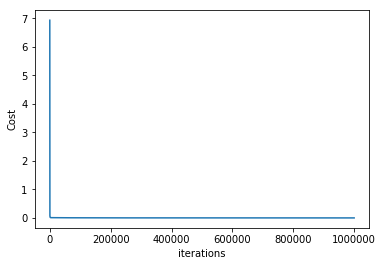

In [233]:
n_x=np.squeeze(np.shape(X[0]))
n_h=10
n_y=10
learningrate = 1
print_cost=True

#Label Data
La = np.array([2,0,9,0,3,7,0,3,0,3,5,7,4,0,4,3,3,1,9,0,9,1,1,5,7,4,2,7,4,7,7,5,4,2,6,2,9,5,1,6,7,7,4,9,8,7,8,2,6,7,6])#label
Y=np.zeros((51,10))
for i in range (0,51):
    for j in range (0,10):
        if La[i]==j:
            Y[i][j] = 1
        else:
            Y[i][j] = 0

parameters = two_layer_network(X.T, Y.T, learningrate, n_x, n_h, n_y, 1000000, print_cost)

In [234]:
# Decodes the output that the trained model predicts on the testing set
def Output(A2):
    key = A2[0][0]
    p = 0
    for i in range (0,10):
        if A2[i][0]>=key:
                p = i
                key = A2[i][0]
    return p

In [235]:
# Calculates the accuracy the trained model is able to achieve
def accuracy_predictor(out, La):
    fav = 0
    for i in range(0,51):
        if(out[i]==La[i]):
            fav = fav + 1
    accuracy = fav/51*100
    return accuracy

In [236]:
def modeltest(X,parameters,out):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A1,Z1,linear_cache1 = linear_activation_forward(X, W1, b1, "tanh")
    A2,Z2,linear_cache2 = linear_activation_forward(A1, W2, b2, "Sigmoid")
    A = Output(A2)
    out.append(A)
    return out

In [237]:
Train_X=np.zeros(shape=(784,1))
out = []
for j in range(0,51):
    for i in range(0,784):
        Train_X[i][0] = X[j][i]
    out = modeltest(Train_X, parameters, out)
    
accuracy = accuracy_predictor(out,La)    
print("A :",out, end=" ")
print("\n\naccuracy = ", accuracy, end="%")

A : [2, 0, 9, 0, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 9, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 7, 6] 

accuracy =  100.0%